# Import section

In [1]:
import pandas as pd
import numpy as np

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

# Load data

In [3]:
df_28 = pd.read_csv('./skin-cancer-mnist-ham10000/hmnist_28_28_L.csv')

# Data analysis and prep

In [4]:
df_28.shape

(10015, 785)

In [5]:
df_28.tail()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel0775,pixel0776,pixel0777,pixel0778,pixel0779,pixel0780,pixel0781,pixel0782,pixel0783,label
10010,172,171,173,175,164,187,207,210,208,206,...,210,217,221,209,185,187,192,192,192,0
10011,2,34,108,116,114,119,131,139,139,145,...,173,169,168,168,143,138,83,23,3,0
10012,122,154,162,170,179,197,200,195,202,199,...,221,215,205,187,209,198,187,164,156,0
10013,137,143,141,139,147,152,155,152,155,159,...,172,171,175,183,177,170,169,166,170,0
10014,149,157,157,152,151,152,154,163,149,145,...,159,154,145,106,67,62,103,146,148,6


In [6]:
df_28.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Columns: 785 entries, pixel0000 to label
dtypes: int64(785)
memory usage: 60.0 MB


## Show data as image, just for visualization

In [30]:
df_28_image = df_28.drop('label', axis = 1)

In [31]:
df_28_image = df_28_image.values.reshape(-1, 28, 28)

In [32]:
df_28_image.shape

(10015, 28, 28)

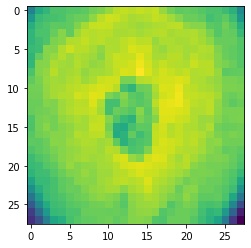

In [35]:
plt.imshow(df_28_image[8])

## Data preparation

In [137]:
X = df_28.drop('label', axis = 1).values
Y = df_28[['label']].values

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 0, test_size = 0.25)

In [139]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

/Users/axelschweiss/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/axelschweiss/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/axelschweiss/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [140]:
X_train_3D = X_train.reshape((-1, 28, 28, 1))
X_test_3D = X_test.reshape((-1, 28, 28, 1))

In [141]:
anz_klassen = df_28['label'].nunique()
anz_klassen

7

## CNN Model in Keras

In [151]:
model = Sequential()
model.add(Dense(units=14, activation='relu', input_shape=(28,28,1)))
#model.add(Conv2D(16, (3,3), input_shape=(28,28,1), activation='relu'))
model.add(Conv2D(28, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(56, (5,5), activation='relu'))
#model.add(MaxPooling2D(2,2))
#model.add(Conv2D(20, (3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(units=anz_klassen, activation='softmax'))

model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 28, 28, 14)        28        
_________________________________________________________________
conv2d_78 (Conv2D)           (None, 26, 26, 28)        3556      
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 13, 13, 28)        0         
_________________________________________________________________
conv2d_79 (Conv2D)           (None, 9, 9, 56)          39256     
_________________________________________________________________
flatten_36 (Flatten)         (None, 4536)              0         
_________________________________________________________________
dense_49 (Dense)             (None, 7)                 31759     
Total params: 74,599
Trainable params: 74,599
Non-trainable params: 0
_________________________________________________________________


In [152]:
history = model.fit(X_train_3D, y_train, epochs=10, batch_size=16, validation_data=(X_test_3D, y_test))

Train on 7511 samples, validate on 2504 samples
Epoch 1/10
7511/7511 [==============================] - 11s 1ms/step - loss: 1.0844 - acc: 0.6646 - val_loss: 1.0563 - val_acc: 0.6466
Epoch 2/10
7511/7511 [==============================] - 10s 1ms/step - loss: 0.9870 - acc: 0.6749 - val_loss: 0.9758 - val_acc: 0.6729
Epoch 3/10
7511/7511 [==============================] - 10s 1ms/step - loss: 0.9424 - acc: 0.6826 - val_loss: 0.9822 - val_acc: 0.6705
Epoch 4/10
7511/7511 [==============================] - 10s 1ms/step - loss: 0.9132 - acc: 0.6915 - val_loss: 0.9456 - val_acc: 0.6813
Epoch 5/10
7511/7511 [==============================] - 9s 1ms/step - loss: 0.8888 - acc: 0.6982 - val_loss: 0.9031 - val_acc: 0.6857
Epoch 6/10
7511/7511 [==============================] - 9s 1ms/step - loss: 0.8639 - acc: 0.7010 - val_loss: 0.9115 - val_acc: 0.6933
Epoch 7/10
7511/7511 [==============================] - 9s 1ms/step - loss: 0.8498 - acc: 0.7102 - val_loss: 0.9230 - val_acc: 0.6853
Epoch 8/10

## Show history

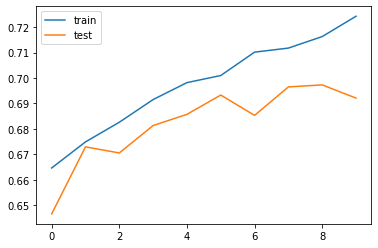

In [153]:
acc_train = history.history['acc']
acc_test = history.history['val_acc']

x_achse = list(range(len(acc_train)))

plt.plot(x_achse, acc_train, label='train')
plt.plot(x_achse, acc_test, label='test')
plt.legend()